# Veri Görselleştirmeye Giriş

## Veri Tipleri

### Quantitive Data
Her türlü numerik veri için kullanılır. Veriler miktar veya büyüklük belirtir. "Continuous" ve "discrete" olmak üzere ikiye ayrılır.

#### Continuous Data 
Bir sayı aralığı içerisindeki bütün değerleri alabilen verilere denir. Örn. hava sıcaklık değeri (örn. 21.2°C), mesafe (örn. 314.42m), ağırlık (örn. 34.0kg) vb.

#### Discrete Data
Sadece tamsayı olarak kaydedilebilen verilerdir. Örneğin bir sınıftaki kişi sayısı, bir raftaki kitap sayısı, veya tamsayıya yuvarlanmış veriler.

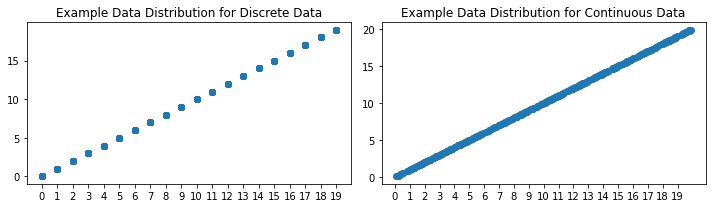

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size = 500
max_val = 20

arr_discrete = np.random.randint(max_val, size=size)
arr_continuous = np.random.rand(size) * max_val

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axes[0].scatter(arr_discrete, arr_discrete)
axes[1].scatter(arr_continuous, arr_continuous)

axes[0].set_xticks(np.arange(0, 20, 1))
axes[1].set_xticks(np.arange(0, 20, 1))

axes[0].set_title('Example Data Distribution for Discrete Data')
axes[1].set_title('Example Data Distribution for Continuous Data')

fig.tight_layout()

### Qualitative Data
Numerik olmayan veri tipleridir, fakat numerik değerler kullanılarak temsil edilebilirler.

#### Binary Data
Evet-hayır, var-yok, yazı-tura, doğru-yanlış vb. tipindeki sadece iki değer taşıyan veri tipleridir. Genellikle negatif ifade 0 ile temsil edilirken pozitif ifade 1 ile temsil edilir.

#### Ordinal Data
Kategorik verilerdir, fakat kategoriler arasında bir sıralama mevcuttur. Örneğin bir hastalığın kaçıncı evrede olduğunu belirten bir veri ordinal veriye örnek olarak verilebilir. Evreler arasında bir sıralama mevcuttur, fakat discrete verilerde olduğu gibi "ne kadar daha büyük" sorusuna cevap verilemez.

#### Nominal Data
Kategorik veri tipleridir. Örneğin tişört rengi `['kirmizi', 'mavi', 'yesil']` olabilir. Bu durumda tişört renkleri `{'kirmizi':0, 'mavi':1, 'yesil':2}` şeklinde temsil edilebilir. *Discrete* veri tipinden farklı olarak burada kullanılan sayılar bir büyüklük belirtmemekte, sadece farklı bir sınıfı temsil etmektedir. Örneğin *discrete* verilerde 2 sayısı 0 sayısından büyüktür, fakat *nominal* veri tipinde bu büyüklük bir anlam ifade etmez.

## Veriyi Görselleştirmek

### Bar Chart (Sütun Grafiği)

Discrete, nominal ve binary verilerin dağılımlarının gösteriminde kullanışlıdır.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


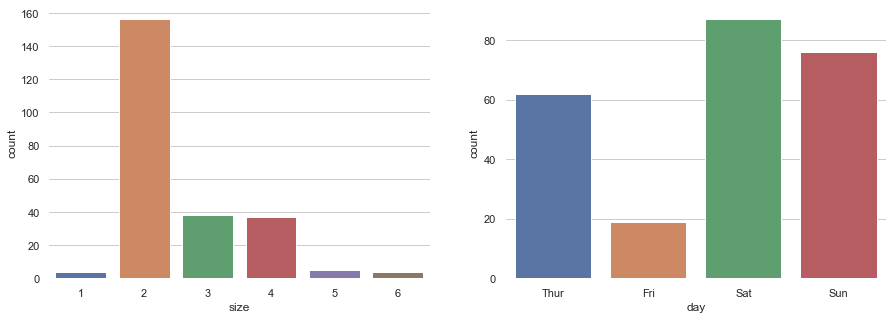

In [3]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x="size", data=tips, ax=ax[0])
sns.countplot(x="day", data=tips, ax=ax[1])
sns.despine(left=True, bottom=True)

### Dot Plots (Nokta Grafiği)

Sütun grafiği ile benzerdir. Farklı olarak bir bar göstermektense tek bir nokta gösterir.

In [4]:
import seaborn as sns

sns.set_theme(style="whitegrid")
crashes = sns.load_dataset("car_crashes")
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


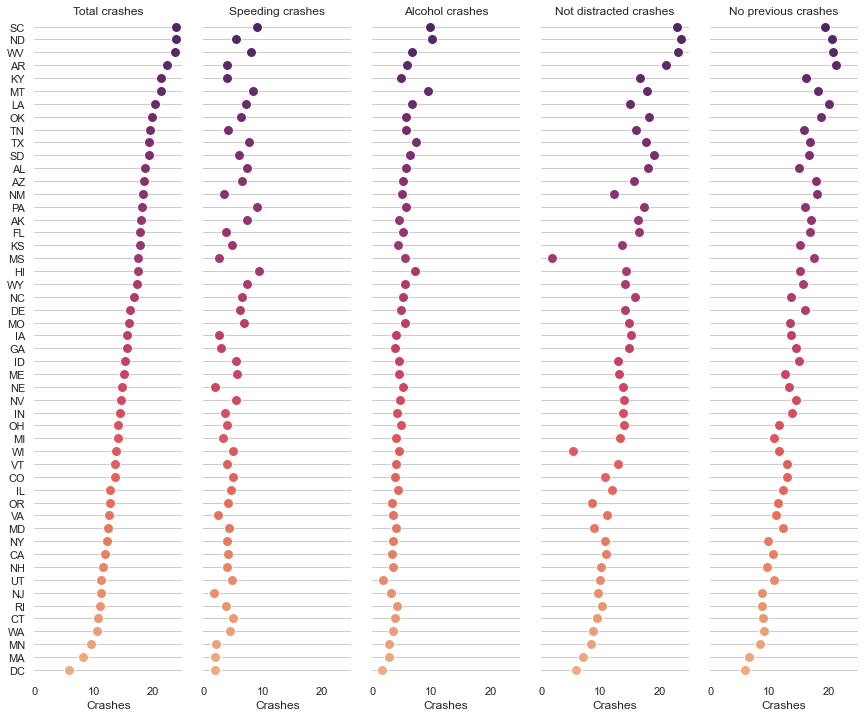

In [5]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

### Histogram

Continuous verilerin dağılımını göstermekte kullanışlıdır. Veri eşit aralıklara bölünür ve bu aralıklardaki değerlerin sayısı bar olarak gösterilir. Bu değer aralığı değeri `bin` parametresi ile değiştirilir.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


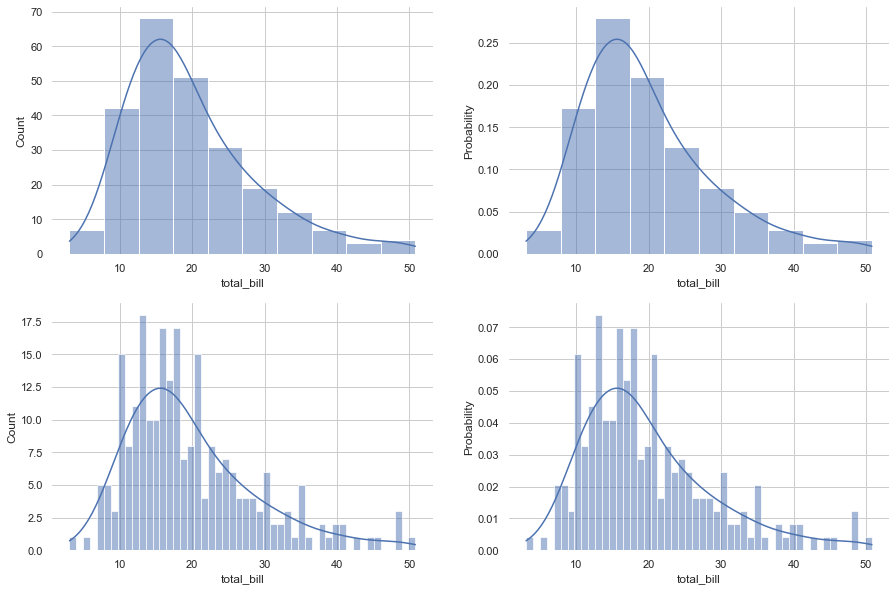

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))

sns.histplot(data=tips, x="total_bill", stat='count', ax=ax[0][0], kde=True, bins=10)
sns.histplot(data=tips, x="total_bill", stat='probability', ax=ax[0][1], kde=True, bins=10)
sns.histplot(data=tips, x="total_bill", stat='count', ax=ax[1][0], kde=True, bins=50)
sns.histplot(data=tips, x="total_bill", stat='probability', ax=ax[1][1], kde=True, bins=50)

sns.despine(left=True, bottom=True)

### Violin Plot

Histograma benzer bir amaçla kullanılabilir. Özellikle continuous bir datayı binary ve nominal data ile kıyaslarken kullanışlıdır.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


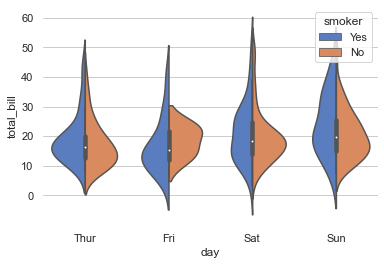

In [9]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)
sns.despine(left=True, bottom=True)

### Scatter Plot (Serpilme Grafiği)

İki continuous veriyi kıyaslamakta kullanışlıdır. Verideki trendleri ve farklı gruplar arasındaki farklılıkları görselleştirmekte kullanılabilir.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


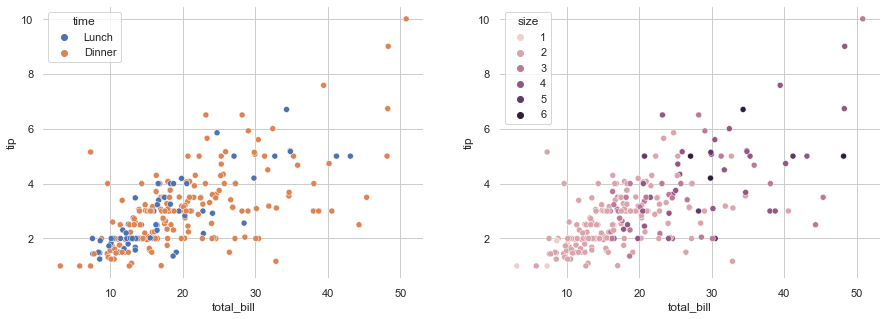

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=ax[0])
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", ax=ax[1])

sns.despine(left=True, bottom=True)

### Line Plot (Çizgi Grafiği)
Scatter plot'a benzerdir, farklı olarak noktalar birbirine bağlıdır. Genellikle continuous bir değişkenin zaman içerisindeki davranışını göstermek için kullanılır.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


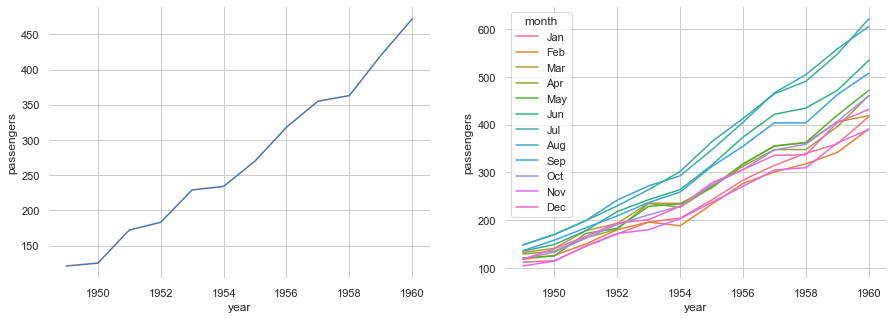

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers", ax=ax[0])
sns.lineplot(data=flights, x="year", y="passengers", hue="month", ax=ax[1])

sns.despine(left=True, bottom=True)

In [14]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


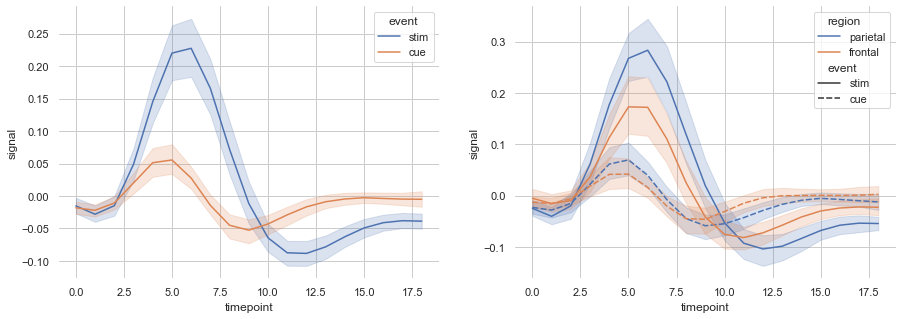

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", ax=ax[0])
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event", ax=ax[1])

sns.despine(left=True, bottom=True)

### Box Plots (Kutu grafiği)
Box plot kullanılarak pek çok bilgi aynı anda gösterilebilir. Continuous ve nominal değişkenlerle kullanılmaya uygundur.

İçerdiği bilgiler:

- Medyan (Ortanca Değer): Kutunun içerisindeki çizgi
- Quartile 1 ve Quartile 3: Kutunun alt ve üst çizgileri
- IQR(Interquantile Range/çeyrekler açıklığı): Kutunun uzunluğu
- Range (outliers hariç): Bıyıkların uzunluğu
- Statistical Outliers (aykırı değerler): Whisker sınırının dışındaki değerler (Q1-1.5IQR, Q3+1.5IQR)


Not: Quartile 1: Verinin alt yarısının medyan değeri, Quartile 3: verinin üst yarısının medyan değeri.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


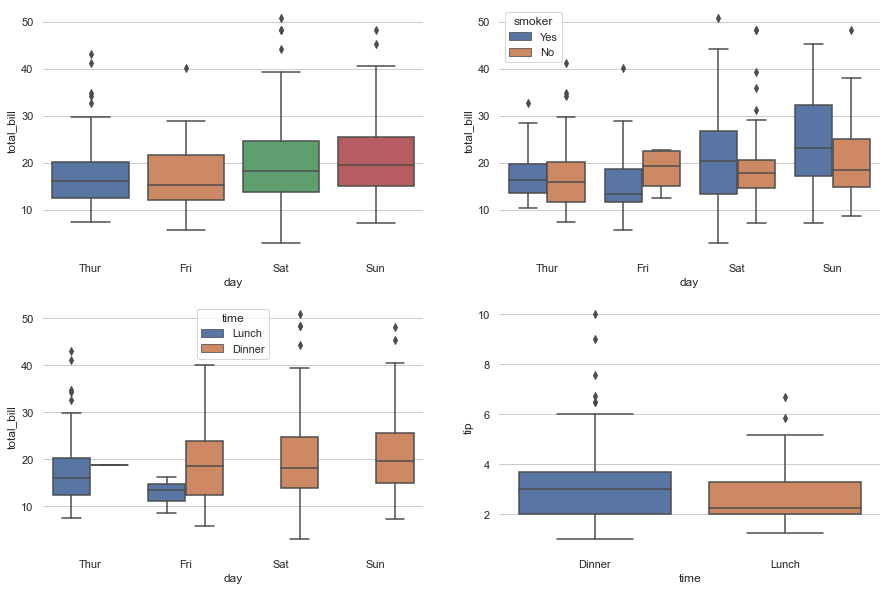

In [17]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))


sns.boxplot(x="day", y="total_bill", data=tips, ax=ax[0][0])
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, ax=ax[0][1])
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, ax=ax[1][0])
ax = sns.boxplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"], ax=ax[1][1])

sns.despine(left=True, bottom=True)